# Lineal Regression Execution

In [1]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


Execution Time: 39344.9 ms



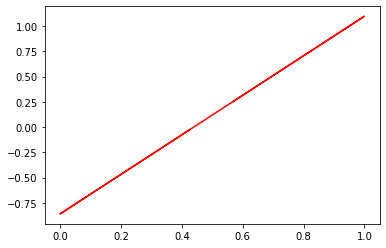

In [22]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter("model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
startTime = datetime.now()
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index']) #tflite_results is the output data.
  
  inputs.append(input_data[0][0])
  outputs.append(tflite_results[0][0])

# Plot the results:
delta = datetime.now() - startTime
print("Execution Time:", '%.1f' % (delta.total_seconds() * 1000), "ms\n")
plt.show(plt.plot(inputs, outputs, 'r'))

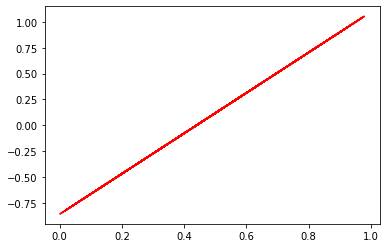

In [16]:

plt.show(plt.plot(inputs, outputs, 'r'))